In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.tsa.api as smt  
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import requests
import io
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
Newyork = pd.read_csv("Newyork.csv")
Newyork.head(2)
pd.set_option('max_columns',1000)
pd.set_option('max_rows',1000)
np.set_printoptions(threshold=np.inf)
pd.set_option('display.width', 1000)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Newyork.shape

(48377, 106)

In [4]:
df = Newyork.copy()

In [5]:
df.shape

(48377, 106)

In [6]:
column_names = df.columns
print(column_names)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], dtype='object', length=106)


In [7]:
# id - listing identifier that can be used to create a join with other files
# last_scraped - we will use it to calculate reviews_per_month
# listing_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# scrape_id - same for all the records
# name - textual description already extracted as continous variables in other columns
# summary - as above
# space - as above
# description - as above
# experiences_offered - contains only none value
# neighborhood_overview - requires lot of preprocessing to turn into useful a feature
# notes - requires lot of preprocessing to turn into useful a feature
# transit - requires lot of preprocessing to turn into useful a feature
# access - requires lot of preprocessing to turn into useful a feature
# interaction - requires lot of preprocessing to turn into useful a feature
# house_rules - requires lot of preprocessing to turn into useful a feature
# thumbnail_url - contains no values
# medium_url - contains no values
# picture_url - interesting if we want to analyse the pictures as well but out of scope otherwise
# xl_picture_url - contains no values
# host_id - id that is not used anywhere else

In [8]:
df.drop('listing_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('scrape_id', inplace=True, axis=1) # dropping as it is not usable
df.drop('name',inplace=True, axis=1) # dropping as it is not usable
df.drop('summary',inplace=True, axis=1) # dropping as it is not usable
df.drop('description',inplace=True, axis=1) # dropping as it is not usable
df.drop('experiences_offered',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighborhood_overview',inplace=True, axis=1) # dropping as it is not usable
df.drop('notes',inplace=True, axis=1) # dropping as it is not usable
df.drop('access',inplace=True, axis=1) # dropping as it is not usable
df.drop('interaction',inplace=True, axis=1) # dropping as it is not usable
df.drop('house_rules',inplace=True, axis=1) # dropping as it is not usable
df.drop('thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('medium_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('xl_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_id',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_location',inplace=True, axis=1) # dropping as it is not usable

In [9]:
df.head()

,id,last_scraped,space,transit,host_url,host_name,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,https://www.airbnb.com/users/show/7192,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/7192/profile_...,https://a0.muscache.com/im/users/7192/profile_...,East Harlem,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"New York, NY, United States",East Harlem,East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,

In [10]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_url', 'host_name', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'm

In [11]:
# From the next 20 columns we will keep the following:

# host_name - can be used to identify words associated with the host in reviews
# host_since - can be used to calculate host experience based on duration since the first listing
# host_location - we can use it to establish if host is local or not
# host_about - since its only a text we will count number of characters
# host_is_superhost - categorical t or f - describing highly rated and relaible hosts - https://www.airbnb.co.uk/superhost
# host_has_profile_pic - categorical t or f - profiles with pictures are seen as more credible
# host_identity_verified - categorical t or f - another credibility metric

# And remove all the below:

# host_url - host profile is out of scope
# host_response_time - this value could be useful but contains high percentage of N/A and is contained within score_communication
# host_response_rate - same as above
# host_acceptance_rate - eaither NA or blank
# host_thumbnail_url - host picture is out of scope
# host_picture_url - host picture is out of scope
# host_neighbourhood - host_location to be instead
# host_listings_count - we will use more accurate calculated_host_listings_count
# host_total_listings_count - as above
# host_verifications - list of host verification methods - information already contained in host_identity_verified
# street - neighbourhood_cleansed will be used instead
# neighbourhood - neighbourhood_cleansed will be used instead

In [12]:
df.drop('host_url', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_time', inplace=True, axis=1) # dropping as it is not usable
df.drop('host_response_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_acceptance_rate',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_thumbnail_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_picture_url',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_neighbourhood',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_total_listings_count',inplace=True, axis=1) # dropping as it is not usable
df.drop('host_verifications',inplace=True, axis=1) # dropping as it is not usable
df.drop('neighbourhood',inplace=True, axis=1) # dropping as it is not usable

In [13]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,New York,NY,10029,New York,"New York, NY",US,United States,40.79851,-73.94399,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,New York,NY,10016,New York,"New York, NY",US,United States,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyves

In [14]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_r

In [15]:
# From the next 20 columns we will keep the following:

# neighbourhood_cleansed - we will use only for visualisation due to number of neighbourhoods while we use gruoupped neighbourhoods instead
# neighbourhood_group_cleansed - categorical value which will be used to identify most popular parts of Barclona
# latitude - we will use it later to visualise the data on the map
# longitude - we will use it later to visualise the data on the map
# property_type - categorical variable
# room_type - categorical variable
# accommodates - discrete value describing property
# bathrooms - another discrete value describing property
# bedrooms - another discrete value describing property
# beds - another discrete value describing property
# bed_type - categorical value describing property
# amenities - due to number of unique features (over 100) we will only concentrate on the total number of amenities
# And remove all the below:

# city - we already know the city
# state - and region being Catalonia
# zipcode - we will use neighbourhood
# market - it is mainly Barcelona
# smart_location - it is mainly Barcelona
# country_code - we already know the country
# country - as above
# is_location_exact - unimportant as it could be inacurate up to 150 meters http://insideairbnb.com/about.html#disclaimers

In [16]:
df.drop('city', inplace=True, axis=1) # dropping as it is not usable
df.drop('state', inplace=True, axis=1) # dropping as it is not usable
df.drop('zipcode',inplace=True, axis=1) # dropping as it is not usable
df.drop('market',inplace=True, axis=1) # dropping as it is not usable
df.drop('smart_location',inplace=True, axis=1) # dropping as it is not usable
df.drop('country_code',inplace=True, axis=1) # dropping as it is not usable
df.drop('country',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_location_exact',inplace=True, axis=1) # dropping as it is not usable

In [17]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,$89.00,$575.00,"$2,100.00",$500.00,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,3 days ago,t,1,3,8,192,2019-09-13,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",NaN,$80.00,$600.00,"$1,600.00",$100.00,$80.00,1,$20.00,10,120,10,10,120,120,10.0,120.0,6 months ago,t,0,0,0,0,2019-09-13,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,$200.00,NaN,NaN,$300.00,$125.00,2,$100.00,3,21,3,3,21,21,3.0,21.0,today,t,3,3,13,13,2019-09-13,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",NaN,$60.00,NaN,NaN,$450.00,$0.00,1,$30.00,45,730,45,45,730,730,45.0,730.0,20 months ago,t,0,0,0,0,2019-09-13,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_wit

In [18]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_ch

In [19]:
# From the next 20 columns we will keep the following:

# price - price per night for number of included guests
# security_deposit - another continous value assiociated with the cost
# cleaning_fee - additional cost at the top of rent
# guests_included - descrete value which we will use to evaluate the cost per person
# extra_people - cost of additional person per night
# minimum_nights - another discrete value that is cost related. Listing with high value of minimum nights are likely sublettings
# first_review - we will use it to calculate reviews_per_month
# last_review - we will use this field to filter out no longer active listings
# number_of_reviews - total number of reviews in entire listing history
# And remove all the below:

# square_feet - could be used to evaluate the property size but most of the values are missing
# weekly_price - mostly blank so we will use price instead
# monthly_price - mostly blank so we will use price instead
# maximum_nights - most of the values are above 30 days suggesting its used as an open bracket
# calendar_updated - we are not interested in future data that is a subject to daily updates
# has_availability - as above
# availability_30 - as above
# availability_60 - as above
# availability_90 - as above
# availability_365 - as above
# calendar_last_scraped - as above

In [20]:
df.drop('square_feet', inplace=True, axis=1) # dropping as it is not usable
df.drop('weekly_price', inplace=True, axis=1) # dropping as it is not usable
df.drop('monthly_price',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_updated',inplace=True, axis=1) # dropping as it is not usable
df.drop('has_availability',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_30',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_60',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_90',inplace=True, axis=1) # dropping as it is not usable
df.drop('availability_365',inplace=True, axis=1) # dropping as it is not usable
df.drop('calendar_last_scraped',inplace=True, axis=1) # dropping as it is not usable

In [21]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,3,3,7,7,3.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,1,1,730,730,1.0,730.0,279,67,2014-09-30,2019-08-29,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,NaN,NaN,f,f,moderate,f,f,1,1,0,0,4.62
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,10,10,120,120,10.0,120.0,9,2,2012-03-20,2018-11-19,93.0,10.0,9.0,10.0,10.0,9.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,3,3,21,21,3.0,21.0,75,10,2009-04-20,2019-07-21,89.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,t,t,1,1,0,0,0.59
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,45,45,730,730,45.0,730.0,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.39


In [22]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
   

In [23]:
# From the final set of columns we will keep the following:

# review_scores_accuracy - discrete value - numbers between 2 and 10
# review_scores_cleanliness - discrete value - numbers between 2 and 10
# review_scores_checkin - discrete value - numbers between 2 and 10
# review_scores_communication - discrete value - numbers between 2 and 10
# review_scores_location - discrete value - numbers between 2 and 10
# review_scores_value - discrete value - numbers between 2 and 10
# instant_bookable - categorical value - t or false
# cancellation_policy - ordinal value with 5 categories that can be ordered from lowest to highest level of flexibility
# require_guest_profile_picture - categorical value - t or false
# require_guest_phone_verification categorical value - t or false
# calculated_host_listings_count - continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual
# And remove all the below:

# review_scores_rating - this value is calculated as weighted sum of other scores
# requires_license - all values are t
# license - textual value that is mostly null
# jurisdiction_names - contains only nulls
# is_business_travel_ready - contains one value of f
# reviews_per_month - we will re-calculate this field using our formula

In [24]:
df.drop('review_scores_rating', inplace=True, axis=1) # dropping as it is not usable
df.drop('requires_license', inplace=True, axis=1) # dropping as it is not usable
df.drop('license',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_minimum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_maximum_nights',inplace=True, axis=1) # dropping as it is not usable
df.drop('minimum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('maximum_nights_avg_ntm',inplace=True, axis=1) # dropping as it is not usable
df.drop('jurisdiction_names',inplace=True, axis=1) # dropping as it is not usable
df.drop('is_business_travel_ready',inplace=True, axis=1) # dropping as it is not usable
df.drop('reviews_per_month',inplace=True, axis=1) # dropping as it is not usable

In [25]:
df.head()

,id,last_scraped,space,transit,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3647,2019-09-13,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,"New York, NY, United States",Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,0,1,0
1,3831,2019-09-13,Greetings! We own a double-duplex brownst...,B52 bus for a 10-minute ride to downtown Brook...,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,"Brooklyn, NY, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,67,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1,1,0,0
2,5022,2019-09-13,Loft apartment with high ceiling and wood floo...,NaN,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,"New York, NY, United States",East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,1,0,0
3,5099,2019-09-13,I have a large 1 bedroom apartment centrally l...,From the apartment is a 10 minute walk to Gran...,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,"New York, NY, United States",Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,10,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1,1,0,0
4,5121,2019-09-13,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,"Brooklyn, NY, United States",Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,0,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0,1,0


In [26]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'space', 'transit', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], dtype='object')


In [27]:
df.drop('number_of_reviews_ltm', inplace=True, axis=1) # dropping as it is not usable
df.drop('street', inplace=True, axis=1) # dropping as it is not usable
df.drop('transit',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_entire_homes',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_private_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('calculated_host_listings_count_shared_rooms',inplace=True, axis=1) # dropping as it is not usable
df.drop('space',inplace=True, axis=1) # dropping as it is not usable

In [28]:
df.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [29]:
column_names = df.columns
print(column_names)

Index(['id', 'last_scraped', 'host_name', 'host_since', 'host_about', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count'], dtype='object')


In [30]:
df_sel = df.copy()

In [31]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,3647,2019-09-13,Elisabeth,2008-11-25,Make Up Artist National/ (Website hidden by Ai...,f,t,t,Harlem,Manhattan,40.80902,-73.94190,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",$150.00,$200.00,$75.00,2,$20.00,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,$500.00,NaN,1,$0.00,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
2,5022,2019-09-13,Laura,2009-01-29,I have been a NYer for almost 10 years. I came...,f,t,t,East Harlem,Manhattan,40.79851,-73.94399,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,Elev...",$80.00,$100.00,$80.00,1,$20.00,10,9,2012-03-20,2018-11-19,10.0,9.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",$200.00,$300.00,$125.00,2,$100.00,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
4,5121,2019-09-13,Garon,2009-02-03,"I am an artist(painter, filmmaker) and curato...",f,t,f,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,$450.00,$0.00,1,$30.00,45,49,2009-05-28,2017-10-05,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1


In [32]:
df_sel.drop(df_sel[df_sel['number_of_reviews'] <= 0].index, inplace = True) 
# dropping all values less than or equal to 0 as it is equal to NAN or NA

In [33]:
df_sel['number_of_reviews'].unique()

array([279,   9,  75,  49, 443, 118,  94, 161,  54, 198, 171, 116,  27,
       160, 203, 277,  62, 134,  74,  96,  21,  58,  30, 248,  95, 206,
       172,  67, 239, 218, 253,  15,  25,  84, 100,  11, 258,  12, 138,
       121,  80, 349,  19, 108,  20, 298, 142,  23,  44,   5, 143, 192,
         4, 357, 155, 110, 197,  50,  52, 109, 146,  63,  55,  73,  17,
        61, 201,   2, 178, 175,  22, 168, 123,  82,   1,  31, 139,  46,
       339,  88, 164,  29, 177, 342, 469,   7,  38, 331, 356,  16,  14,
       156, 266,  78, 194,   3, 428, 238,  85, 127, 243,  28,  34, 135,
       126, 240, 322, 305, 152,  59, 234, 193,  87, 117, 219,  18, 222,
        33,  53, 128,  51, 208, 113, 290, 378,  10,   6,  39, 369, 236,
       211, 261, 115, 130,  37, 213,  71, 225, 205,  98, 231, 475, 184,
        92, 151,  81, 183, 187, 125, 106, 360, 448,  45, 259, 145,  36,
       292, 233,  64, 227,  72,  56,  99,  65, 133,  48, 122,  40,  32,
        70,  69,  26, 209, 232, 295, 409, 185,   8,  35,  66, 39

In [34]:
df_sel['price']=df_sel['price'].str.replace('$','')
df_sel['price']=df_sel['price'].str.replace(',','')
df_sel['price']=df_sel['price'].str.replace('.','').astype(float)

In [35]:
df_sel['extra_people']=df_sel['extra_people'].str.replace('$','')
df_sel['extra_people']=df_sel['extra_people'].str.replace(',','')
df_sel['extra_people']=df_sel['extra_people'].str.replace('.','').astype(float)

In [36]:
# security_deposit - conversion from $ to numeric values
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('$','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace(',','')
df_sel['security_deposit']=df_sel['security_deposit'].str.replace('.','').astype(float)

In [37]:
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('$','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace(',','')
df_sel['cleaning_fee']=df_sel['cleaning_fee'].str.replace('.','').astype(float)

In [38]:
df_sel['security_deposit'].isnull().sum()

11838

In [39]:
df_sel['cleaning_fee'].isnull().sum()

6315

In [40]:
df_sel['cleaning_fee'] = df_sel ['cleaning_fee'].fillna(df_sel['cleaning_fee'].mean()).astype(float)

In [41]:
df_sel['cleaning_fee'].isnull().sum()

0

In [42]:
df_sel['security_deposit'] = df_sel ['security_deposit'].fillna(df_sel['security_deposit'].mean()).astype(float)

In [43]:
df_sel['security_deposit'].isnull().sum()

0

In [44]:
df_sel['host_about'].isnull().sum()

13914

In [45]:
df_sel['host_about'] = df_sel.host_about.fillna('')

In [46]:
df_sel['host_about'].isnull().sum()

0

In [47]:
df_sel1 = df_sel.copy()

In [48]:
df_sel = df_sel.dropna()

In [49]:
df_sel.isnull().sum()

id                                  0
last_scraped                        0
host_name                           0
host_since                          0
host_about                          0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
number_of_re

In [50]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,f,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",f,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,f,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,f,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,f,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [51]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_sel['host_is_superhost']= label_encoder.fit_transform(df_sel['host_is_superhost'])

In [52]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,t,t,Clinton Hill,Brooklyn,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,f,f,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,t,f,Murray Hill,Manhattan,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,t,t,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,t,f,Hell's Kitchen,Manhattan,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,f,f,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,t,t,Upper West Side,Manhattan,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,t,t,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,t,t,East Village,Manhattan,40.72764,-73.97949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1


In [53]:
df_sel['host_has_profile_pic'] = label_encoder.fit_transform(df_sel['host_has_profile_pic'])

In [54]:
df_sel['host_identity_verified'] = label_encoder.fit_transform(df_sel['host_identity_verified'])

In [55]:
df_sel['instant_bookable'] = label_encoder.fit_transform(df_sel['instant_bookable'])

In [56]:
df_sel['require_guest_profile_picture'] = label_encoder.fit_transform(df_sel['require_guest_profile_picture'])

In [57]:
df_sel['require_guest_phone_verification'] = label_encoder.fit_transform(df_sel['require_guest_phone_verification'])

In [58]:
df_sel['cancellation_policy'] = label_encoder.fit_transform(df_sel['cancellation_policy'])

In [59]:
df_sel['bed_type'] = label_encoder.fit_transform(df_sel['bed_type'])

In [60]:
df_sel['room_type'] = label_encoder.fit_transform(df_sel['room_type'])

In [61]:
df_sel['neighbourhood_group_cleansed'] = label_encoder.fit_transform(df_sel['neighbourhood_group_cleansed'])

In [62]:
df_sel['property_type'] = label_encoder.fit_transform(df_sel['property_type'])

In [63]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1


In [64]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37659 entries, 1 to 48176
Data columns (total 40 columns):
id                                  37659 non-null int64
last_scraped                        37659 non-null object
host_name                           37659 non-null object
host_since                          37659 non-null object
host_about                          37659 non-null object
host_is_superhost                   37659 non-null int32
host_has_profile_pic                37659 non-null int32
host_identity_verified              37659 non-null int32
neighbourhood_cleansed              37659 non-null object
neighbourhood_group_cleansed        37659 non-null int32
latitude                            37659 non-null float64
longitude                           37659 non-null float64
property_type                       37659 non-null int32
room_type                           37659 non-null int32
accommodates                        37659 non-null int64
bathrooms                  

In [65]:
df_sel.select_dtypes(include='object').columns

Index(['last_scraped', 'host_name', 'host_since', 'host_about', 'neighbourhood_cleansed', 'amenities', 'first_review', 'last_review'], dtype='object')

In [66]:
# listing_duration = 
df_sel['last_review']= pd.to_datetime(df_sel['last_review'])
df_sel['first_review']= pd.to_datetime(df_sel['first_review'])
df_sel['listing_duration'] = df_sel['last_review'] - df_sel['first_review']

In [67]:
# hosting_duration = 
df_sel['host_since']= pd.to_datetime(df_sel['host_since'])
df_sel['hosting_duration'] = df_sel['last_review'] - df_sel['host_since']

In [68]:
# host_about_len = 
df_sel['host_about_len']=df_sel['host_about'].str.replace('NA','0')

In [69]:
df.drop('host_about',inplace=True, axis=1) # dropping as it is not usable

In [70]:
# price_per_person - (price/accommodates)
df_sel['price_per_person'] =df_sel['price'] / df_sel['accommodates']

In [71]:
a_longitude= 40.7128
a_latitude= 74.0060

In [72]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [73]:
for index, row in df_sel.iterrows():
    df_sel.loc[index, 'distance'] = haversine(a_longitude, a_latitude, row['longitude'], row['latitude'])

In [74]:
df_sel.head(5)

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person,distance
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667,6373.457483
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000,6367.205106
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000,6365.626879
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000,6361.269989
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000,6369.442641


In [75]:
df_sel['last_scraped']= pd.DatetimeIndex(df_sel.last_scraped)
df_sel['first_review']= pd.DatetimeIndex(df_sel.first_review)
df_sel['last_review']= pd.DatetimeIndex(df_sel.last_review)
df_sel['host_since']= pd.DatetimeIndex(df_sel.host_since)

In [76]:
df_sel.head()

,id,last_scraped,host_name,host_since,host_about,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,first_review,last_review,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,listing_duration,hosting_duration,host_about_len,price_per_person,distance
1,3831,2019-09-13,LisaRoxanne,2008-12-07,Laid-back bi-coastal actor/professor/attorney.,0,1,1,Clinton Hill,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",8900.0,50000.000000,6331.088211,1,0.0,1,279,2014-09-30,2019-08-29,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,1794 days,3917 days,Laid-back bi-coastal actor/professor/attorney.,2966.666667,6373.457483
3,5099,2019-09-13,Chris,2009-02-02,"I'm an artist, writer, traveler, and a native ...",0,1,0,Murray Hill,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",20000.0,30000.000000,12500.000000,2,10000.0,3,75,2009-04-20,2019-07-21,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,3744 days,3821 days,"I'm an artist, writer, traveler, and a native ...",10000.000000,6367.205106
5,5178,2019-09-13,Shunichi,2009-03-03,I used to work for a financial industry but no...,0,1,0,Hell's Kitchen,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",7900.0,24972.470991,1500.000000,1,1200.0,2,443,2009-05-06,2019-08-27,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3765 days,3829 days,I used to work for a financial industry but no...,3950.000000,6365.626879
6,5203,2019-09-13,MaryEllen,2009-02-05,Welcome to family life with my oldest two away...,0,1,1,Upper West Side,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",7900.0,24972.470991,6331.088211,1,0.0,2,118,2009-09-07,2017-07-21,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,2874 days,3088 days,Welcome to family life with my oldest two away...,7900.000000,6361.269989
7,5222,2019-09-13,Marilyn,2009-02-06,I'm a writer who came to NYC for graduate scho...,0,1,1,East Village,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",11600.0,50000.000000,7500.000000,2,1500.0,30,94,2009-02-23,2016-06-15,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,2669 days,2686 days,I'm a writer who came to NYC for graduate scho...,5800.000000,6369.442641


In [77]:
df_sel = df_sel.drop(['last_scraped','host_name','host_since','host_about','neighbourhood_cleansed','amenities','first_review','last_review','listing_duration','hosting_duration','host_about_len'], axis=1)

In [78]:
df_sel.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
1,3831,0,1,1,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,8900.0,50000.000000,6331.088211,1,0.0,1,279,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,2966.666667,6373.457483
3,5099,0,1,0,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,20000.0,30000.000000,12500.000000,2,10000.0,3,75,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,10000.000000,6367.205106
5,5178,0,1,0,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,7900.0,24972.470991,1500.000000,1,1200.0,2,443,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3950.000000,6365.626879
6,5203,0,1,1,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,7900.0,24972.470991,6331.088211,1,0.0,2,118,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,7900.000000,6361.269989
7,5222,0,1,1,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,11600.0,50000.000000,7500.000000,2,1500.0,30,94,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,5800.000000,6369.442641


In [79]:
X=df_sel.drop(['price'],1)
y = df_sel['price']

In [80]:
X.head(5)

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
1,3831,0,1,1,1,40.68514,-73.95976,17,0,3,1.0,1.0,4.0,4,50000.000000,6331.088211,1,0.0,1,279,9.0,9.0,10.0,9.0,10.0,9.0,0,1,0,0,1,2966.666667,6373.457483
3,5099,0,1,0,2,40.74767,-73.97500,1,0,2,1.0,1.0,1.0,4,30000.000000,12500.000000,2,10000.0,3,75,10.0,9.0,10.0,10.0,9.0,9.0,0,1,1,1,1,10000.000000,6367.205106
5,5178,0,1,0,2,40.76489,-73.98493,1,2,2,1.0,1.0,1.0,4,24972.470991,1500.000000,1,1200.0,2,443,8.0,7.0,9.0,9.0,10.0,8.0,0,3,0,0,1,3950.000000,6365.626879
6,5203,0,1,1,2,40.80178,-73.96723,1,2,1,1.0,1.0,1.0,4,24972.470991,6331.088211,1,0.0,2,118,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,1,7900.000000,6361.269989
7,5222,0,1,1,2,40.72764,-73.97949,1,0,2,1.0,1.0,1.0,4,50000.000000,7500.000000,2,1500.0,30,94,9.0,9.0,10.0,10.0,10.0,9.0,0,3,0,0,1,5800.000000,6369.442641


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(26361, 33)
(11298, 33)
(11298,)


In [82]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6987829570744384
R^2 score for test: 0.7899394341859203


In [83]:
X.columns

Index(['id', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'price_per_person', 'distance'], dtype='object')

In [84]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X=df_sel.drop(['price','id'],1)
y = df_sel['price']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3213.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:46:13   Log-Likelihood:            -4.0117e+05
No. Observations:               37659   AIC:                         8.024e+05
Df Residuals:                   37626   BIC:                         8.027e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.026e+10   8.35e+08     12.282      0.000    8.62e+09    1.19e+10
host_is_superhost                  314.5517    136.069      2.312      0.021      47.853     581.251
host_has_profile_pic              1309.5827   1254.441      1.044      0.297   -1149.156    3768.322
host_identity_verified              66.2476    110.712      0.598      0.550    -150.751     283.246
neighbourhood_group_cleansed      -237.5717     90.005     -2.640      0.008    -413.984     -61.160
latitude                         -1.232e+08      1e+07    -12.284      0.000   -1.43e+08   -1.04e+08
longitude                        -2.912e+07   2.37e+06    -12.293      0.000   -3.38e+07   -2.45e+07
property_type                       44.8329      6.257      7.165      0.000      32.568      57.098
room_type                         -609.5209     65.653     -9.284      0.000    -738.203    -480.839
accommodates                      3670.6978     52.598     69.788      0.000    3567.604    3773.791
bathrooms                         4108.6580    143.932     28.546      0.000    3826.548    4390.768
bedrooms                          1168.8220    105.696     11.058      0.000     961.656    1375.988
beds                              -900.3635     75.385    -11.944      0.000   -1048.119    -752.608
bed_type                           -86.7083    174.950     -0.496      0.620    -429.615     256.199
security_deposit                     0.0176      0.001     11.787      0.000       0.015       0.021
cleaning_fee                         0.3154      0.014     22.237      0.000       0.288       0.343
guests_included                   -380.1315     58.480     -6.500      0.000    -494.754    -265.509
extra_people                         0.0215      0.023      0.948      0.343      -0.023       0.066
minimum_nights                     -22.4812      2.944     -7.635      0.000     -28.252     -16.710
number_of_reviews                   -6.4317      1.157     -5.557      0.000      -8.700      -4.163
review_scores_accuracy             117.0185     98.803      1.184      0.236     -76.638     310.675
review_scores_cleanliness          259.5779     66.735      3.890      0.000     128.776     390.380
review_scores_checkin             -315.5023    103.073     -3.061      0.002    -517.528    -113.477
review_scores_communication       -127.0571    105.222     -1.208      0.227    -333.295      79.181
review_scores_location             397.5984     84.739      4.692      0.000     231.508     563.689
review_scores_value                -39.8969     89.991     -0.443      0.658    -216.281     136.488
instant_bookable                   115.7365    112.946      1.025      0.306    -105.641     337.115
cancellation_policy               -101.1928     42.84

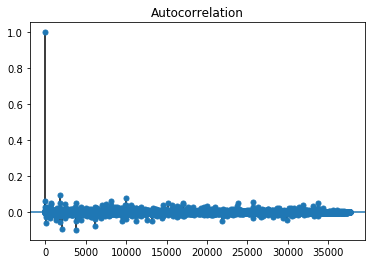

In [85]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid)
acf.show()

In [86]:
import scipy.stats as stats

In [87]:
print(stats.jarque_bera(lin_reg.resid))

(2862431836.2239127, 0.0)


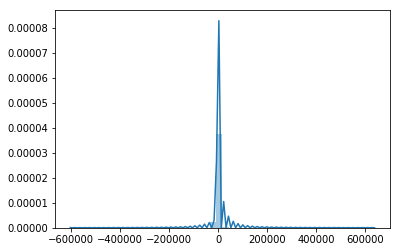

In [88]:
sns.distplot(lin_reg.resid)

In [89]:
df_sel = df_sel.transform(lambda x: np.exp(x))
df_sel.head()

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,price_per_person,distance
1,inf,1.0,2.718282,2.718282,2.718282,4.670160e+17,7.580264e-33,2.415495e+07,1.000000,20.085537,2.718282,2.718282,54.598150,54.59815,inf,inf,inf,2.718282,1.0,2.718282e+00,1.472857e+121,8103.083928,8103.083928,22026.465795,8103.083928,22026.465795,8103.083928,1.0,2.718282,1.000000,1.000000,2.718282,inf,inf
3,inf,1.0,2.718282,1.000000,7.389056,4.971509e+17,7.465617e-33,2.718282e+00,1.000000,7.389056,2.718282,2.718282,2.718282,54.59815,inf,inf,inf,7.389056,inf,2.008554e+01,3.733242e+32,22026.465795,8103.083928,22026.465795,22026.465795,8103.083928,8103.083928,1.0,2.718282,2.718282,2.718282,2.718282,inf,inf
5,inf,1.0,2.718282,1.000000,7.389056,5.057860e+17,7.391850e-33,2.718282e+00,7.389056,7.389056,2.718282,2.718282,2.718282,54.59815,inf,inf,inf,2.718282,inf,7.389056e+00,2.468627e+192,2980.957987,1096.633158,8103.083928,8103.083928,22026.465795,2980.957987,1.0,20.085537,1.000000,1.000000,2.718282,inf,inf
6,inf,1.0,2.718282,2.718282,7.389056,5.247928e+17,7.523851e-33,2.718282e+00,7.389056,2.718282,2.718282,2.718282,2.718282,54.59815,inf,inf,inf,2.718282,1.0,7.389056e+00,1.765017e+51,22026.465795,22026.465795,22026.465795,22026.465795,22026.465795,22026.465795,1.0,1.000000,2.718282,2.718282,2.718282,inf,inf
7,inf,1.0,2.718282,2.718282,7.389056,4.872920e+17,7.432171e-33,2.718282e+00,1.000000,7.389056,2.718282,2.718282,2.718282,54.59815,inf,inf,inf,7.389056,inf,1.068647e+13,6.663176e+40,8103.083928,8103.083928,22026.465795,22026.465795,22026.465795,8103.083928,1.0,20.085537,1.000000,1.000000,2.718282,inf,inf


In [90]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
X=df_sel.drop(['price','id'],1)
y = df_sel['price']
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

MissingDataError: exog contains inf or nans

In [ ]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid)
acf.show()

In [ ]:
import scipy.stats as stats

In [ ]:
print(stats.jarque_bera(lin_reg.resid))

In [ ]:
sns.distplot(lin_reg.resid)

In [ ]:
fggrgregregreg

In [ ]:
dcdsvvdfsvbfbf

In [ ]:
sgvrfvgdrv

In [ ]:
gssgrssrfv

In [ ]:
RFE

In [ ]:
lin_reg = LinearRegression()

In [ ]:
rfe = RFE(lin_reg, 5)

In [ ]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lin_reg.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
nof_list=np.arange(1,32)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    lin_reg = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lin_reg.fit(X_train_rfe,y_train)
    score = lin_reg.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
lin_reg = LinearRegression()
#Initializing RFE model
rfe = RFE(lin_reg, 20)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
lin_reg.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [ ]:
X = df1[['neighbourhood_group_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'require_guest_profile_picture', 'calculated_host_listings_count', 'price_per_person']]
y = df1.price
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y, X_constant).fit()
predictions = lin_reg.predict(X_constant)
lin_reg.summary()

In [ ]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=1, normalize=True)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)

In [ ]:
ridgeReg.score(X_test,y_test)

In [ ]:
ridgeReg.score(X_train,y_train)

In [ ]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=18, normalize=True)
lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth':range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["mse", "mae"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
tr=grid_search.best_estimator_
tr

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90,],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator =rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

In [ ]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
rft=grid_search.best_estimator_
rft

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf2 = LinearRegression()
clf3 = Ridge()
clf4 = Lasso()
bagging1 = BaggingRegressor(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingRegressor(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingRegressor(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingRegressor(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
label = ['Decision Tree','Bagging Tree','Linear','bagg_lr','Ridge','bagg_ridge','Lasso','bagg_lasso']
clf_list = [clf1,bagging1,clf2,bagging2,clf3,bagging3,clf4,bagging4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.linear_model import LinearRegression

In [ ]:
import xgboost
from sklearn.metrics import explained_variance_score

In [ ]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

In [ ]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = BaggingRegressor(DecisionTreeRegressor(),
                   max_features=0.8, n_estimators=200, 
                            random_state=0)
dtree= DecisionTreeRegressor()

In [ ]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

In [ ]:
ada_clf.score(X_test, y_test)

In [ ]:
bag_tree = BaggingRegressor(RandomForestRegressor(),
                   max_features=0.8, n_estimators=200, 
                            random_state=0)
rf= RandomForestRegressor()

In [ ]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

In [ ]:
bag_tree.score(X_train, y_train)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 =AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10)

In [ ]:

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf2 = LinearRegression()
clf3 = Ridge()
clf4 = Lasso()
boster1 = AdaBoostRegressor(base_estimator=clf1, n_estimators=10)
boster2 = AdaBoostRegressor(base_estimator=clf2, n_estimators=10)
boster3 = AdaBoostRegressor(base_estimator=clf3, n_estimators=10)
boster4 = AdaBoostRegressor(base_estimator=clf4, n_estimators=10)
label = ['Decision Tree','Bos_Tree','Linear','bos_lr','Ridge','bos_ridge','Lasso','bos_lasso']
clf_list = [clf1,boster1,clf2,boster2,clf3,boster3,clf4,boster4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    